# Final Project

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Cleaning

Data cleaning is a crucial step in the data preparation process for any analysis, modeling, or decision-making task involving data. It involves identifying and rectifying errors, inconsistencies, inaccuracies, and other issues present in a dataset. 

## Reading and understanding our data

In [2]:
df = pd.read_csv("/kaggle/input/diamonds-price-dataset/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


According to the output we have  50000 (0 to 49999), as well as 9 features with "price" as target variable. There is no missing values for all the features and the target variable.

## Change columns "cut" and "claritt" to ordinals

In aoccrodance to the infomation gives by the original source, the columns "cut" and "clarity" can be easily trarmed to ordinal data.

### cut

In [4]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Transforming thet data in this column usign the folowing encoding.

{'Ideal': 4, 'Premium': 3, 'Good': 1, 'Very Good': 2, 'Fair': 0}

In [5]:
new_values = {'Ideal': 4, 'Premium': 3, 'Good': 1, 'Very Good': 2, 'Fair': 0}
df["cut"] = df["cut"].replace(new_values)

### clarity

In [6]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Transforming thet data in this column usign the folowing encoding.

{"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}

In [7]:
new_values = {"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}
df["clarity"] = df["clarity"].replace(new_values)

## Statistical Description

Use descib e method in order to describe the columns using first order statistcal descriptos.

This description only has performed in numeric values.

In [8]:
df.describe()

,carat,cut,clarity,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,2.902700,3.047700,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.116717,1.643532,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,4.000000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Look for correlations

We use corr() method from our pandas object in order to look for correlations between the features. The correlation performed is based in Coeficient Pearsonn Correlation that is the noramlized form of covariance, that indicates correlation between variables, when 1 is potivie correlation, -1 is negative correlation and 0 means ther is no corelation. Remember only aplies to numeric values.

In [9]:
hous_num = df.select_dtypes(include = ['float64', 'int64'])
hous_num.corr()

,carat,cut,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
clarity,-0.352435,0.189024,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


Now only use see correlations between te features and the outpút, but establishing an thrshold of 0.5 in order to visualize the more correlated features with the output (negative and positive correlation)

In [10]:
hous_num_corr = hous_num.corr()["price"].drop("price")
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with price:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with price:
carat    0.921804
x        0.884919
y        0.864393
z        0.860963
Name: price, dtype: float64


Now, let's generate some bar plots.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


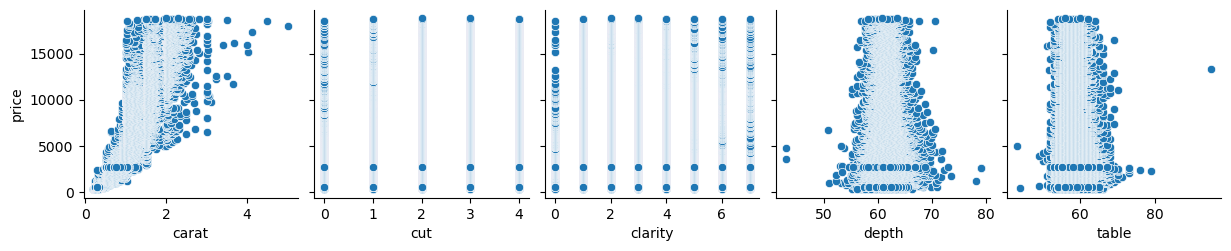

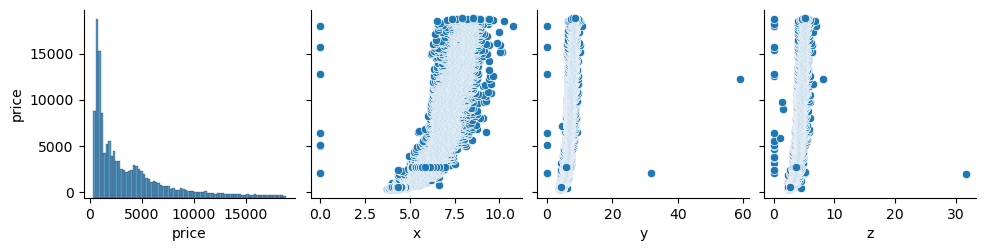

In [11]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                 x_vars=hous_num.columns[i:i+5],
                 y_vars=['price'])